## PyTorch API  
<table class="tfo-notebook-buttons" align="right" style="margin-top:-55px">
<td>
      <a target="_blank" href="https://pytorch.org/docs/stable/torch.html"><CNTER> <img src="https://pytorch.org/assets/images/logo.svg"  width="100" /><p style='margin-left:12px'></p></CENTER></a>
  </td>
 </table>

In [ ]:
!git clone https://github.com/FawadAbbas12/AI_101_Workshop
%cd AI_101_Workshop 

In [1]:
import torch
import numpy as np
from torch import nn
from utils import to_categorical
from torch import optim
from tqdm import tqdm

## Datasets

Torchvision provides many built-in datasets in the torchvision.datasets module, as well as utility classes for building your own datasets.

In this example we will Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers

```
dataset = torchvision.datasets.MNIST('path/to/imagenet_root/')
```

All datasets are subclasses of torch.utils.data.Dataset i.e, they have ```__getitem__``` and ```__len__``` methods implemented. 

So we can use a simple loop to iterate over the data 
whoes workflow will be as following
```
for image, lable in dataset:
    .....................
    .....................
```

In [2]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
dataset = MNIST('res/dataset_dir', download=True,  transform=ToTensor())
images, labels = dataset._load_data()

In [3]:
from torch.utils.data import DataLoader
loader = DataLoader(dataset, batch_size=16)

In [4]:
for x,y in loader:
    break
to_categorical(y,10).shape

torch.Size([16, 10])

## Build a machine learning model
`Sequential` is useful for stacking layers where each layer has one input tensor and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most PyTorch models are composed of layers. This model uses the 
`Flatten`, `Linear`, `Relu`, `Dropout` and `Softmax` layers.

### Linear Layers

The linear layer is not just a good starting example: it is the fundmental workhorse of all neural networks, so as simple as it is, it is worth examining carefully.

`torch.nn.Linear` implements the function `y = Ax + b`, which takes m-dimensional input `x` and produces n-dimensional output `y`, by multiplying by the n &times; m matrix `A` (whose specific values are called the `weight`) and adding n-dimensional vector `b` (whose values are called the `bias`).  We can make a Linear network with 3d input and 2d output just like this:
        net = torch.nn.Linear(3, 3)

### Flatten
Flattens a contiguous range of dims into a tensor. i.e. it will transform a tenosr of shape Nx1x28x28 to Nx1784

Parameters:

                start_dim (int) – first dim to flatten (default = 1).
                end_dim   (int) – last dim to flatten (default = -1).


In [5]:
model = nn.Sequential(
    nn.Flatten(1),
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(128, 10),
    nn.Softmax(1)
)

In [6]:
prediction = model(images[0].float()[None,:])
print(prediction.max(), labels[0])

tensor(1., grad_fn=<MaxBackward1>) tensor(5)


Define a loss function for training using `nn.CrossEntropyLoss`:


This criterion computes the cross entropy loss between input logits and target.

It is useful when training a classification problem with C classes. If provided, the optional argument weight should be a 1D Tensor assigning weight to each of the classes. This is particularly useful when you have an unbalanced training set.
Given as 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;![image.png](res/cce.png)

where:

        Σ – a fancy symbol that means “sum”
        n – sample size
        C – Totoal Classes
        y – the actual data value
        p – the predicted data value


In [7]:
criteron = nn.CrossEntropyLoss()
label = torch.Tensor(np.array([labels[0]]))
criteron(prediction, to_categorical(label, 10))

tensor(2.3026, grad_fn=<DivBackward1>)

In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [16]:

# Start the training process
epochs = 5
num_samples = len(labels)
for epoch in range(epochs): 
    running_loss = 0
    for image, label in loader:
        # Forward pass
        outputs = model(image)
        
        # compute average absolute difference between outputs and labels
        loss = criteron(outputs, to_categorical(label, 10))
        
        # Backward pass and optimization
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch: {epoch} Loss:{running_loss/num_samples}')

Epoch: 0 Loss:7.026015301465988
Epoch: 1 Loss:7.023881449103356
Epoch: 2 Loss:7.023404880166054
Epoch: 3 Loss:7.022314645171165
Epoch: 4 Loss:7.02209096801281


In [14]:
prediction = model(images[0].float()[None,:])
print(prediction.max(), labels[0])

tensor(1., grad_fn=<MaxBackward1>) tensor(5)


### Save Model

In [ ]:
model.state_dict()

OrderedDict([('Input_layer.weight',
              tensor([[ 0.5897,  0.5210],
                      [-1.0692,  1.1050],
                      [ 0.5826, -0.0235],
                      [-0.9829,  0.7093],
                      [-0.4149, -0.7844],
                      [ 1.2539,  0.2572],
                      [ 1.1695, -0.7772],
                      [-0.0900,  0.7850],
                      [ 0.0259,  0.0862],
                      [-0.1766, -1.0552],
                      [ 1.1009, -0.7854],
                      [-0.9762, -0.3895]], device='cuda:0')),
             ('Input_layer.bias',
              tensor([-1.0531,  0.1497,  1.1448,  0.1157, -0.8415, -0.6481,  0.1588, -1.0083,
                       1.0886,  0.7502,  0.1387, -0.4556], device='cuda:0')),
             ('First_hidden_layer.weight',
              tensor([[-1.6741e+00,  2.4323e-01,  1.5600e-01,  6.6235e-02, -4.1870e+00,
                       -8.0738e-01, -1.0381e+00, -2.9278e-01,  1.8466e-01, -2.8517e-01,
               

In [ ]:

save_path = 'res/model_zoo/saved_model.pt'
torch.save(
    model.state_dict(), # model's weights 
    save_path
)

### Load Model 

In [ ]:
ckpt = torch.load(
    save_path,
    map_location='cpu'
)
print(ckpt.keys())

odict_keys(['Input_layer.weight', 'Input_layer.bias', 'First_hidden_layer.weight', 'First_hidden_layer.bias', 'Second_hidden_layer.weight', 'Second_hidden_layer.bias', 'Output_layer.weight', 'Output_layer.bias'])


In [ ]:
from utils import Net as NEW_MODEL
model = NEW_MODEL()  

In [ ]:
model.load_state_dict(
    ckpt,
    strict=True
)

<All keys matched successfully>

### Infer 

In [ ]:
prediction = model(images[0].float()[None,:])
print(prediction.max(), labels[0])

### Multi Layer Model

In [2]:
from torch import nn
from torch.nn import functional as F
class MODEL(nn.Module):
    def __init__(self,in_size=1, out_size=1) -> None:
        super().__init__()
        # X_IN
        self.Input_layer = torch.nn.Linear(in_size, 12)
        # H_1
        self.First_hidden_layer = torch.nn.Linear(12, 32)
        # H_2
        self.Second_hidden_layer = torch.nn.Linear(32, 12)
        # Y_OUT
        self.Output_layer = torch.nn.Linear(12, out_size)
    
    def forward(self, input):
        ####################################
        ## Extract Features from First Layer
        ## X => X_IN
        input_features = self.Input_layer(
                            input
                        )
        non_linear_features = F.relu(input_features)
        
        # X_IN => H_1 
        features_1 = self.First_hidden_layer(
                        non_linear_features
                    )
        non_linear_features = F.relu(features_1)
        
        # H_1 => H_2
        features_2 = self.Second_hidden_layer(
                        non_linear_features
                    )
        non_linear_features = F.relu(features_2)
        
        # H_2 => Y_OUT
        output_features = self.Output_layer(
                        non_linear_features
                    )
        return output_features

## Image Datasets and Dataloaders in pytorch

In [ ]:
from torchvision import datasets

#### How NN takes input

In [25]:
from IPython.display import Video
Video('res/vids/How_NN_Takes_Input.mp4', embed=True, width=700)

Data sets can be thought of as big arrays of data.  If the data set is small enough (e.g., MNIST, which has 60,000 28x28 grayscale images), a dataset can be literally represented as a single pytorch tensor.  With one number per pixel, MNIST takes about 200 megabytes of RAM, which fits comfortably into a modern computer.

But larger-scale datasets like `CAT DOG (60,000 300x300 RGB images) requiring 15 GB of RAM` or ImageNet have more than a million higher-resolution full-color images.  In these cases, an ordinary python array or pytorch tensor would require more than a terabyte of RAM, which is impractical on most computers.

Instead, we need to load the data from disk (or SSD).  Unfortunately, the latency of loading from disk is very slow compared to RAM, so we need to do the loading cleverly if we want to load the data quickly.

To solve the problem, pytorch provides two classes:
 * `torch.utils.data.Dataset` - This very simple base class represents an array where the actual data may be slow to fetch, typically because the data is in disk files that require some loading, decoding, or other preprocessing. Pytorch provides a variety of different `Dataset` subclasses.  For example, there is a handy one called `ImageFolder` that treats a directory tree of image files as an array of classified images.
 * `torch.utils.data.DataLoader` - This fancy class wraps a `Dataset` as a stream of data batches.  Behind the scenes it uses a few techniques to feed the data faster.  You do not need to subclass `DataLoader` - its purpose is to make a `Dataset` speedy.

In [4]:
import torchvision
import torch
dataset = torchvision.datasets.ImageFolder(
        'res/dataset_dir/cat_dog/val',
        torchvision.transforms.Compose([
            torchvision.transforms.RandomHorizontalFlip(),
            torchvision.transforms.RandomVerticalFlip(),
            torchvision.transforms.Resize((300,300)),
            # torchvision.transforms.RandomCrop(112),
            # torchvision.transforms.Grayscale(),
            # torchvision.transforms.ToTensor(),
            # torchvision.transforms.Normalize(
            #         mean=[0.449],
            #         std=[0.226]
            #     ),
        ])
    )
print('Length is', len(dataset))


Length is 323


1st item is a pair (<PIL.Image.Image image mode=RGB size=300x300 at 0x7F442808ADC0>, 0)


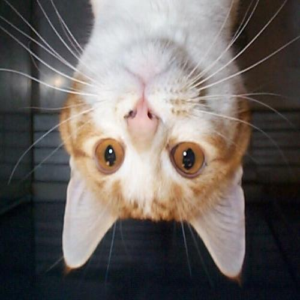

Class name is 0


In [10]:

item = dataset[0]
print('1st item is a pair', item)

# Display the PIL image and the class name directly.
display(item[0])
# print('Class name is', val_set.classes[item[1]])
print('Class name is', item[1])

#### Custom Transforms

In [11]:
from operator import mul
from functools import reduce

#Image Transform 
class Flatten:
    def __init__(self,target_input, is_rgb= False) -> None:
        self.target_input = target_input
        self.is_rgb = is_rgb
    def __call__(self, img):        
        return img.reshape(-1, reduce(mul,self.target_input))

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

#Lable Transform
class ToCategorical:
    def __init__(self, max_classes, target_device) -> None:
        self.max_classes = max_classes
        self.target_device = target_device

    def __call__(self, lable):
        lable = int(lable)
        categorical = torch.zeros(self.max_classes)
        if lable > self.max_classes:
            raise f'Provided {lable} maps out of class range as max classes are {self.max_classes}'
        categorical[lable] = 1
        return categorical[None,:].to(self.target_device)

    def __repr__(self) -> str:
        return f"{self.__class__.__name__}()"

### Build Model

Dense Neural Network

In [16]:
from torch import nn
from torch.nn import functional as F
class CAT_DOG_MODEL(nn.Module):
    def __init__(self, in_size=9000, out_size=1, hidden_size=5, hidden_layers=2, device='cpu'):
        super(CAT_DOG_MODEL, self).__init__()
        hidden_sizes= []
        for _ in range(hidden_layers):
            hidden_sizes.append(
                [hidden_size,
                hidden_size*2])
            hidden_size*=2
            
        self.layers = nn.Sequential(
			nn.Linear(in_size, hidden_size, device=device),
			nn.ReLU(),
			*[nn.Sequential(nn.Linear(hidden_size, hidden_size, device=device), nn.LeakyReLU()) for _ in range(hidden_layers)],
			nn.Linear(hidden_size, out_size, device=device),
		)
        self.device = device
    
    def forward(self, x):
        return self.layers(x)

#### Train

In [17]:
import os
import torch
from torch import optim
from tqdm import tqdm
import torchvision
class Train_Cat_DOG():
    def __init__(
            self,
            train_set,
            val_set,            
            in_shape=(300,300), 
            batch_size=32,
            out_size=1, 
            hidden_size=5, 
            hidden_layers=2,
            sched_step=300,
            save_path='./model_zoo',
            device=0
        ) -> None:
        
        # data Transformation
        self.train_transform = torchvision.transforms.Compose([
                # Randomly Flip Image
                torchvision.transforms.RandomHorizontalFlip(),
                torchvision.transforms.RandomVerticalFlip(),
                # Resize Image to Standard Format
                torchvision.transforms.Resize(in_shape),
                # Convert to gray Scale
                torchvision.transforms.Grayscale(),
                # Convert Data To tensor form
                torchvision.transforms.ToTensor(),
                # Normalize data to Zero Mean 
                torchvision.transforms.Normalize(
                    mean=[0.4572],
                    std=[0.0197]
                ),
                Flatten(in_shape),
            ])
        self.val_transform = torchvision.transforms.Compose([
                # Resize Image to Standard Format
                torchvision.transforms.Resize(in_shape),
                # Convert to gray Scale
                torchvision.transforms.Grayscale(),
                # Convert Data To tensor form
                torchvision.transforms.ToTensor(),
                # Normalize data to Average Mean
                torchvision.transforms.Normalize(
                    mean=[0.4659],
                    std=[0.0222]
                ),
                Flatten(in_shape),
            ])
        
        #Lable Transform
        self.target_transform = torchvision.transforms.Compose([
                # Convert Data to categorical form
                # i.e cat: 0 => [1,0], dog: 1 => [0,1]
                ToCategorical(2, target_device=device),
            ])
        self.batch_size = batch_size
        ## Training Data Loader
        self.train_set =  torchvision.datasets.ImageFolder(
            train_set,
            transform=self.train_transform,
            target_transform=self.target_transform
        )
        ## Validatin Data Loader
        self.val_set =  torchvision.datasets.ImageFolder(
            val_set,
            transform=self.val_transform, 
            target_transform=self.target_transform
        )
        
        ## Model
        self.net = CAT_DOG_MODEL(
                    in_shape[0]*in_shape[1],
                    out_size,
                    hidden_size,
                    hidden_layers,
                    device=device
                )
        
        self.criteron = nn.CrossEntropyLoss()
        self.sched_step = sched_step
        self.save_path = save_path
        if not os.path.exists(self.save_path):
            os.makedirs(self.save_path, exist_ok=True)
        self.device = device
        self.in_shape = in_shape
        
    def train(self, epochs=10, start_epoch=0,lr=0.001, eval_duration=5, save_duration=5, resume=None):
        self.optimizer = optim.Adam(self.net.parameters(), lr=lr)    
            # criteron = lambda x, y: torch.mean(torch.abs(x - y))
            
        self.scheduler = optim.lr_scheduler.StepLR(self.optimizer, step_size=self.sched_step, gamma=0.5)
        if resume:
            pass
        bset_running_loss = 1e100
        bset_val_loss = 1e100
        for epoch in range(start_epoch,epochs,1):
            
            # Train Step
            running_loss = self.train_step(
                epoch
            )
            if running_loss < bset_running_loss:
                bset_running_loss = running_loss 
                self.save_state(
                    epochs, 
                    epoch,
                    self.batch_size,
                    eval_duration,
                    running_loss,
                    name='best.pt'
                )
            if epoch%save_duration==0:
                self.save_state(
                    epochs, 
                    epoch,
                    self.batch_size,
                    eval_duration,
                    running_loss
                )
            if epoch%eval_duration == 0:
                loss = self.eval_step(
                    epoch
                )
        # self.eval_step(
        #     epoch
        # )
    def train_step(self, epoch):
        self.net.train()
        running_loss = self.process_step(self.train_set)
        print('Train Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
        self.scheduler.step()
        return running_loss
    @torch.no_grad()
    def eval_step(self, epoch):
        self.net.train(False)  
        running_loss = self.process_step(self.val_set)
        print('Val Epoch: {}, Loss: {:.10f}'.format(epoch, running_loss))
        return running_loss
    
    def process_step(self, set):
        is_training = self.net.training
        running_loss = []
        for inputs, labels in tqdm(set):
            # label transform
            # labels = torch.tensor([labels], dtype=torch.float32)[None,:]
            # Forward pass
            inputs = inputs.to(self.device)
            outputs = self.net(inputs)
            # compute average absolute difference between outputs and labels
            loss = self.criteron(outputs, labels)
            # loss = self.criteron(outputs.softmax(0), labels)
            if is_training:
                # Backward pass and optimization
                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()
            running_loss.append(loss.item())
        return sum(running_loss)/len(running_loss)
    
    def save_state(self, epochs, start_epoch, batch_size, eval_duration, running_loss, name=''):
        state = {
            'net':self.net.state_dict(),
            'optimizer':self.optimizer.state_dict(),
            'lr_sec':self.scheduler.state_dict(),
            'save_dir':self.save_path,
            'epochs':epochs,
            'start_epoch':start_epoch,
            'batch_size':batch_size,
            'device':self.device,
            'eval_duration':eval_duration,
            'loss':running_loss
        }
        torch.save(
            state,
            os.path.join(self.save_path, name if name else f'Epoch_{str(start_epoch).zfill(4)}.pth')
        )
    def load_state(self):
        pass  

In [18]:
trainer = Train_Cat_DOG(
            'res/dataset_dir/cat_dog/train',
            'res/dataset_dir/cat_dog/val',
            in_shape=(600,600),
            batch_size=32,
            out_size=2, 
            hidden_size=32, 
            hidden_layers=5,
            sched_step=10,
            save_path='./model_zoo',
            device='cpu'
            )

In [ ]:
trainer.train(
    10,0,save_duration=1
)

# Save and Close

In [ ]:
%%javascript
IPython.notebook.save_checkpoint();
window.onbeforeunload = null
window.close();
IPython.notebook.session.delete();